In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def _normalize(img):
    new_image = np.zeros((img.shape))
    max_ = img.max()
    min_ = img.min()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            new_image[i][j] = (img[i][j]-min_)/(max_-min_)*255
    new_image = np.array(new_image, dtype="uint8")
    return new_image

In [3]:
def _gauss(row, col, sigma):
    gauss = np.zeros((row,col))
    for i in range(row):
        for j in range(col):
            gauss[i][j] = np.exp(-((i-row//2)**2+(j-col//2)**2)/(2*sigma**2))/(2*np.pi*sigma**2)
    visual_filter = _normalize(gauss)
    plt.imshow(visual_filter, "gray")
    plt.show()
    return gauss


In [4]:
def _blpf(row, col, d0, n):
    row = int(row)//2
    col = int(col)//2
    x, y = np.mgrid[-row:row, -col:col]
    a = np.sqrt(x**2+y**2)
    f=(a/d0)**(2*n)
    filter = 1/(1+f)
    fac = 255/filter.max()
    visual_filter = filter*fac
    plt.imshow(visual_filter, "gray")
    plt.show()
    return filter

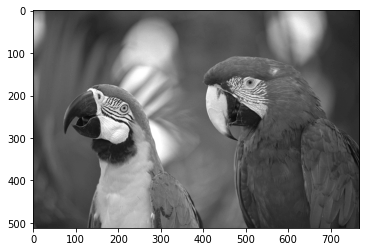

In [5]:
path = "../img/birdie.png"
inp_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
plt.imshow(inp_img, "gray")
plt.show()

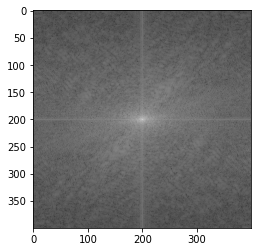

In [6]:
img = cv2.resize(inp_img, (400,400))
img = np.log1p(img)
img = np.fft.fft2(img)
img = np.fft.fftshift(img)
magnitude = np.log(np.abs(img))
plt.imshow(magnitude, "gray")
plt.show()

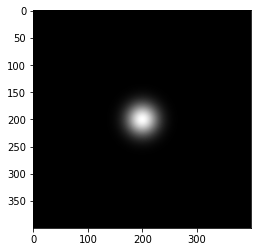

In [7]:
filter = _gauss(img.shape[0], img.shape[1], 20)
# filter = _blpf(img.shape[0],img.shape[1], 10,2)

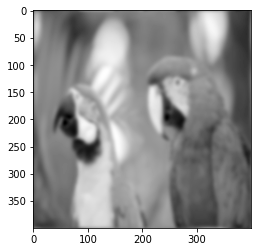

In [8]:
mag = np.abs(img)
ang = np.angle(img)
new_mag = mag*filter
combined = np.multiply(new_mag, np.exp(1j*ang))
output = np.real(np.fft.ifft2(np.fft.ifftshift(combined)))
output = np.exp(output)-1
output = _normalize(output)
plt.imshow(output, "gray")
plt.show()

In [10]:
cv2.imwrite("Filtered Image.jpg", output)

True